In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import IPython
import sys
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.model_selection import train_test_split
from math import sqrt

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
%matplotlib inline

# Increases the size of sns plots
plt.rcparams={'figure.figsize':(13,15)}
sns.set(rc={'figure.figsize':(13,15)})

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  

In [2]:
#loading the datasets
dataset = pd.read_csv("Hackathon_2022/resources/Dataset.csv")
interactions = pd.read_csv("Hackathon_2022/resources/Interactions.csv")


In [3]:
interactions.head()

,property_id,request_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15


In [4]:
interactions.shape

(170611, 2)

In [5]:
interactions.property_id.value_counts().shape

(22779,)

In [6]:
intact = interactions.property_id.value_counts()

In [7]:
intact.to_csv("Hackathon_2022/resources/interactions_count.csv")

In [8]:
intact = pd.read_csv("Hackathon_2022/resources/interactions_count.csv")

In [9]:
intact.shape

(22779, 2)

In [10]:
intact.head()

,Unnamed: 0,property_id
0,ff80818159e061800159e4614bf4368d,193
1,ff8081815ae03cc6015aeb9caaf065ee,183
2,ff80818159c49a360159c600065a0c66,168
3,ff8081815a8d7af5015a8d85892d05ef,165
4,ff80818156b651790156b6cb4b360940,145


In [11]:
intact.rename(columns={'Unnamed: 0': 'prop_id', 'property_id':'count'}, inplace = True)

In [12]:
intact.head()

,prop_id,count
0,ff80818159e061800159e4614bf4368d,193
1,ff8081815ae03cc6015aeb9caaf065ee,183
2,ff80818159c49a360159c600065a0c66,168
3,ff8081815a8d7af5015a8d85892d05ef,165
4,ff80818156b651790156b6cb4b360940,145


In [13]:
intact = intact.reindex(list(range(0, 28888))).reset_index(drop=True)

In [14]:
intact.shape

(28888, 2)

In [15]:
intact.head()

,prop_id,count
0,ff80818159e061800159e4614bf4368d,193.0
1,ff8081815ae03cc6015aeb9caaf065ee,183.0
2,ff80818159c49a360159c600065a0c66,168.0
3,ff8081815a8d7af5015a8d85892d05ef,165.0
4,ff80818156b651790156b6cb4b360940,145.0


In [16]:
intact.fillna = 0

In [17]:
dataset.shape

(28888, 21)

In [18]:
dataset.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF


In [19]:
intact.head()

,prop_id,count
0,ff80818159e061800159e4614bf4368d,193.0
1,ff8081815ae03cc6015aeb9caaf065ee,183.0
2,ff80818159c49a360159c600065a0c66,168.0
3,ff8081815a8d7af5015a8d85892d05ef,165.0
4,ff80818156b651790156b6cb4b360940,145.0


In [20]:
dataset.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF


In [21]:
intact[['prop_id']] = np.sort(dataset[['property_id']], axis=1)[:, ::-1]

In [22]:
intact.head()

,prop_id,count
0,ff808081469fd6e20146a5af948000ea,193.0
1,ff8080814702d3d10147068359d200cd,183.0
2,ff808081470c645401470fb03f5800a6,168.0
3,ff808081470c6454014715eaa5960281,165.0
4,ff808081474aa867014771a0298f0aa6,145.0


In [23]:
intact.to_csv("Hackathon_2022/resources/interactions_count.csv", index= False)

In [24]:
intact = pd.read_csv("Hackathon_2022/resources/interactions_count.csv")

In [25]:
intact.head()

,prop_id,count
0,ff808081469fd6e20146a5af948000ea,193.0
1,ff8080814702d3d10147068359d200cd,183.0
2,ff808081470c645401470fb03f5800a6,168.0
3,ff808081470c6454014715eaa5960281,165.0
4,ff808081474aa867014771a0298f0aa6,145.0


In [26]:
dataset['count']= intact['count']

In [27]:
dataset.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,count
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,193.0
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,183.0
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,168.0
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP,165.0
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF,145.0


In [28]:
dataset.fillna=0

In [29]:
dataset.to_csv("Hackathon_2022/resources/Dataset_rev.csv", index= False)

In [30]:
dataset_rev = pd.read_csv("Hackathon_2022/resources/Dataset_rev.csv")

In [31]:
dataset_rev.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,count
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,193.0
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,183.0
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,168.0
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP,165.0
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF,145.0


In [32]:
dataset_rev.describe()

,bathroom,floor,total_floor,gym,latitude,longitude,lift,property_age,property_size,swimming_pool,pin_code,rent,deposit,count
count,28888.000000,28888.000000,28845.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,2.856300e+04,28888.000000,2.888800e+04,22779.000000
mean,1.795867,1.786659,3.518807,0.165951,12.957859,77.605186,0.279009,4.380539,966.338999,0.142585,5.615600e+05,14430.768797,1.233257e+05,7.489837
std,0.778676,2.361768,3.362536,0.372043,0.219500,0.921003,0.448520,7.458914,619.390016,0.349655,8.979452e+04,9055.133718,1.255028e+05,10.372140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.000000,0.000000e+00,1.000000
25%,1.000000,0.000000,2.000000,0.000000,12.906324,77.563295,0.000000,0.000000,600.000000,0.000000,5.600400e+05,8000.000000,5.000000e+04,2.000000
50%,2.000000,1.000000,3.000000,0.000000,12.953939,77.614568,0.000000,3.000000,900.000000,0.000000,5.600670e+05,12500.000000,1.000000e+05,4.000000
75%,2.000000,2.000000,4.000000,0.000000,13.009369,77.669235,1.000000,6.000000,1200.000000,0.000000,5.600840e+05,18000.000000,1.500000e+05,9.000000
max,22.000000,123.000000,38.000000,1.000000,21.176277,80.256293,1.000000,800.000000,40000.000000,1.000000,5.601000e+06,75000.000000,4.200000e+06,193.000000


In [33]:
dataset_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      28888 non-null  object 
 1   type             28888 non-null  object 
 2   activation_date  28888 non-null  object 
 3   bathroom         28888 non-null  int64  
 4   floor            28888 non-null  int64  
 5   total_floor      28845 non-null  float64
 6   furnishing       28888 non-null  object 
 7   gym              28888 non-null  int64  
 8   latitude         28888 non-null  float64
 9   longitude        28888 non-null  float64
 10  lease_type       28888 non-null  object 
 11  lift             28888 non-null  int64  
 12  locality         28888 non-null  object 
 13  parking          28888 non-null  object 
 14  property_age     28888 non-null  int64  
 15  property_size    28888 non-null  int64  
 16  swimming_pool    28888 non-null  int64  
 17  pin_code    

In [34]:
dataset_rev.corr()

,bathroom,floor,total_floor,gym,latitude,longitude,lift,property_age,property_size,swimming_pool,pin_code,rent,deposit,count
bathroom,1.000000,0.200301,0.308542,0.349116,0.002251,0.017699,0.391851,-0.044380,0.646216,0.347466,0.004956,0.646894,0.433894,0.010987
floor,0.200301,1.000000,0.703243,0.374423,-0.004787,0.011533,0.409331,-0.116624,0.174076,0.394791,0.000527,0.229936,0.120096,-0.011625
total_floor,0.308542,0.703243,1.000000,0.525917,-0.010095,0.015315,0.575179,-0.139920,0.271322,0.549655,0.001396,0.345358,0.189497,-0.014412
gym,0.349116,0.374423,0.525917,1.000000,-0.023224,0.022616,0.649837,-0.105415,0.334415,0.801647,0.008748,0.364114,0.196104,0.046712
latitude,0.002251,-0.004787,-0.010095,-0.023224,1.000000,0.638954,-0.023839,0.011009,0.001547,-0.014571,-0.038626,-0.001732,0.010448,-0.004066
longitude,0.017699,0.011533,0.015315,0.022616,0.638954,1.000000,0.024266,-0.006113,0.016204,0.021252,0.002308,0.016724,0.005411,-0.000531
lift,0.391851,0.409331,0.575179,0.649837,-0.023839,0.024266,1.000000,-0.122114,0.356672,0.599912,0.006487,0.391047,0.215417,0.004981
property_age,-0.044380,-0.116624,-0.139920,-0.105415,0.011009,-0.006113,-0.122114,1.000000,-0.012831,-0.099490,-0.000725,0.029461,0.032044,-0.010001
property_size,0.646216,0.174076,0.271322,0.334415,0.001547,0.016204,0.356672,-0.012831,1.000000,0.332194,0.004556,0.623765,0.417910,0.015032
swimming_pool,0.347466,0.394791,0.549655,0.801647,-0.014571,0.021252,0.599912,-0.099490,0.332194,1.000000,0.004874,0.366477,0.204479,0.020748


In [35]:
#getting features with non numerical  or catagorical values
df_catagory = dataset_rev.select_dtypes(exclude=np.number).drop(columns=['property_id'])
df_catagory.head()

,type,activation_date,furnishing,lease_type,locality,parking,building_type
0,BHK2,09-03-2017 14:36,SEMI_FURNISHED,FAMILY,Hulimavu,BOTH,AP
1,BHK2,07-03-2017 12:02,SEMI_FURNISHED,FAMILY,Ramamurthy Nagar,BOTH,AP
2,BHK2,10-03-2017 13:43,NOT_FURNISHED,ANYONE,GM Palya,FOUR_WHEELER,AP
3,BHK3,09-03-2017 22:16,SEMI_FURNISHED,ANYONE,Arakere,BOTH,AP
4,BHK1,15-03-2017 18:29,SEMI_FURNISHED,ANYONE,Hoodi,BOTH,IF


In [36]:
del df_catagory['activation_date']

In [37]:
#check for null values in the df_catagory
df_catagory.isna().sum()

type              0
furnishing        0
lease_type        0
locality          0
parking           0
building_type    79
dtype: int64

In [38]:
df_catagory["building_type"].fillna(df_catagory["building_type"].mode()[0], inplace=True)

In [39]:
df_catagory.isna().sum()

type             0
furnishing       0
lease_type       0
locality         0
parking          0
building_type    0
dtype: int64

In [40]:
df_catagory['type'] = LabelEncoder().fit_transform(df_catagory['type'])
df_catagory['furnishing'] = LabelEncoder().fit_transform(df_catagory['furnishing'])
df_catagory['lease_type'] = LabelEncoder().fit_transform(df_catagory['lease_type'])
df_catagory['locality'] = LabelEncoder().fit_transform(df_catagory['locality'])
df_catagory['parking'] = LabelEncoder().fit_transform(df_catagory['parking'])
df_catagory['building_type'] = LabelEncoder().fit_transform(df_catagory['building_type'])

In [41]:
df_catagory.head()

,type,furnishing,lease_type,locality,parking,building_type
0,1,2,3,903,0,0
1,1,2,3,1829,0,0
2,1,1,0,681,1,0
3,2,2,0,159,0,0
4,0,2,0,873,0,1


In [42]:
df_numeric = dataset_rev.select_dtypes(include=np.number).drop(columns = 'count')

In [43]:
df_numeric.head()

,bathroom,floor,total_floor,gym,latitude,longitude,lift,property_age,property_size,swimming_pool,pin_code,rent,deposit
0,1,3,4.0,1,12.876174,77.596571,1,2,850,1,560076.0,12000,120000
1,2,4,11.0,1,13.018444,77.678122,1,1,1233,1,560016.0,20000,150000
2,2,0,4.0,1,12.975072,77.665865,1,0,1200,0,560075.0,15000,75000
3,2,3,4.0,0,12.888169,77.591282,0,1,1300,0,560076.0,17000,150000
4,1,1,2.0,0,12.990243,77.712962,0,4,450,0,560048.0,6500,40000


In [44]:
del df_numeric['latitude']
del df_numeric['longitude']
del df_numeric['pin_code']

In [45]:
processed_numeric_data = pd.concat([df_numeric,df_catagory] , axis = 1)

In [46]:
processed_numeric_data.isna().sum()

bathroom          0
floor             0
total_floor      43
gym               0
lift              0
property_age      0
property_size     0
swimming_pool     0
rent              0
deposit           0
type              0
furnishing        0
lease_type        0
locality          0
parking           0
building_type     0
dtype: int64

In [47]:
processed_numeric_data.corr()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type
bathroom,1.000000,0.200301,0.308542,0.349116,0.391851,-0.044380,0.646216,0.347466,0.646894,0.433894,0.203228,0.090058,0.091166,0.010402,-0.470782,-0.238957
floor,0.200301,1.000000,0.703243,0.374423,0.409331,-0.116624,0.174076,0.394791,0.229936,0.120096,0.120151,-0.022204,-0.033762,-0.015406,-0.215795,-0.390907
total_floor,0.308542,0.703243,1.000000,0.525917,0.575179,-0.139920,0.271322,0.549655,0.345358,0.189497,0.092939,-0.005016,-0.027595,-0.019233,-0.333499,-0.539881
gym,0.349116,0.374423,0.525917,1.000000,0.649837,-0.105415,0.334415,0.801647,0.364114,0.196104,0.094859,-0.003109,0.007224,0.021071,-0.395052,-0.471250
lift,0.391851,0.409331,0.575179,0.649837,1.000000,-0.122114,0.356672,0.599912,0.391047,0.215417,0.084888,-0.002719,0.005753,-0.003111,-0.529197,-0.707569
property_age,-0.044380,-0.116624,-0.139920,-0.105415,-0.122114,1.000000,-0.012831,-0.099490,0.029461,0.032044,-0.002469,-0.012947,0.019192,-0.000417,0.084703,0.124589
property_size,0.646216,0.174076,0.271322,0.334415,0.356672,-0.012831,1.000000,0.332194,0.623765,0.417910,0.099934,0.082529,0.081608,0.006823,-0.453614,-0.210123
swimming_pool,0.347466,0.394791,0.549655,0.801647,0.599912,-0.099490,0.332194,1.000000,0.366477,0.204479,0.097529,0.000861,0.006946,0.022525,-0.364359,-0.428770
rent,0.646894,0.229936,0.345358,0.364114,0.391047,0.029461,0.623765,0.366477,1.000000,0.647478,0.126345,0.111760,0.128539,-0.011538,-0.455025,-0.249016
deposit,0.433894,0.120096,0.189497,0.196104,0.215417,0.032044,0.417910,0.204479,0.647478,1.000000,0.083293,0.100142,0.127514,0.016287,-0.285971,-0.113648


In [48]:
processed_numeric_data["total_floor"] = processed_numeric_data.groupby(["floor"]).total_floor.transform(lambda x : x.fillna(x.mean()))

In [49]:
processed_numeric_data.isna().sum()

bathroom         0
floor            0
total_floor      0
gym              0
lift             0
property_age     0
property_size    0
swimming_pool    0
rent             0
deposit          0
type             0
furnishing       0
lease_type       0
locality         0
parking          0
building_type    0
dtype: int64

In [50]:
processed_numeric_data.corr()

,bathroom,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type
bathroom,1.000000,0.200301,0.308236,0.349116,0.391851,-0.044380,0.646216,0.347466,0.646894,0.433894,0.203228,0.090058,0.091166,0.010402,-0.470782,-0.238957
floor,0.200301,1.000000,0.703780,0.374423,0.409331,-0.116624,0.174076,0.394791,0.229936,0.120096,0.120151,-0.022204,-0.033762,-0.015406,-0.215795,-0.390907
total_floor,0.308236,0.703780,1.000000,0.525799,0.575015,-0.139956,0.270049,0.549671,0.345038,0.189158,0.093031,-0.004929,-0.027512,-0.019167,-0.333202,-0.539279
gym,0.349116,0.374423,0.525799,1.000000,0.649837,-0.105415,0.334415,0.801647,0.364114,0.196104,0.094859,-0.003109,0.007224,0.021071,-0.395052,-0.471250
lift,0.391851,0.409331,0.575015,0.649837,1.000000,-0.122114,0.356672,0.599912,0.391047,0.215417,0.084888,-0.002719,0.005753,-0.003111,-0.529197,-0.707569
property_age,-0.044380,-0.116624,-0.139956,-0.105415,-0.122114,1.000000,-0.012831,-0.099490,0.029461,0.032044,-0.002469,-0.012947,0.019192,-0.000417,0.084703,0.124589
property_size,0.646216,0.174076,0.270049,0.334415,0.356672,-0.012831,1.000000,0.332194,0.623765,0.417910,0.099934,0.082529,0.081608,0.006823,-0.453614,-0.210123
swimming_pool,0.347466,0.394791,0.549671,0.801647,0.599912,-0.099490,0.332194,1.000000,0.366477,0.204479,0.097529,0.000861,0.006946,0.022525,-0.364359,-0.428770
rent,0.646894,0.229936,0.345038,0.364114,0.391047,0.029461,0.623765,0.366477,1.000000,0.647478,0.126345,0.111760,0.128539,-0.011538,-0.455025,-0.249016
deposit,0.433894,0.120096,0.189158,0.196104,0.215417,0.032044,0.417910,0.204479,0.647478,1.000000,0.083293,0.100142,0.127514,0.016287,-0.285971,-0.113648


In [51]:
#Check for Multi Collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

# the independent variables set 
X = processed_numeric_data.select_dtypes(include=np.number)
  
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

          feature        VIF
0        bathroom  12.988387
1           floor   3.146103
2     total_floor   5.589183
3             gym   3.860977
4            lift   3.924708
5    property_age   1.385798
6   property_size   6.939419
7   swimming_pool   3.524076
8            rent   9.985538
9         deposit   3.408948
10           type   2.194292
11     furnishing   7.838598
12     lease_type   2.261162
13       locality   3.800455
14        parking   2.700811
15  building_type   4.579345


In [52]:
vif_data.sort_values("VIF", axis = 0, ascending = False)

,feature,VIF
0,bathroom,12.988387
8,rent,9.985538
11,furnishing,7.838598
6,property_size,6.939419
2,total_floor,5.589183
15,building_type,4.579345
4,lift,3.924708
3,gym,3.860977
13,locality,3.800455
7,swimming_pool,3.524076


In [53]:
# When VIF is higher than 10 or tolerance is lower than 0.1, 
#there is significant multicollinearity that needs to be corrected. since there is one feature with VIF more than 10, it has to be dropped

In [54]:
processed_numeric_data.drop(columns=['bathroom'], inplace = True)

In [55]:
preprocessed_data = pd.concat([processed_numeric_data, dataset_rev[['property_id', 'count']]] , axis = 1)

In [56]:
preprocessed_data.to_csv('Hackathon_2022/resources/preprocessed_HK_IZ.csv', index = False)

In [57]:
preprocessed_data= pd.read_csv('Hackathon_2022/resources/preprocessed_HK_IZ.csv')

In [58]:
preprocessed_data.head()

,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type,property_id,count
0,3,4.0,1,1,2,850,1,12000,120000,1,2,3,903,0,0,ff808081469fd6e20146a5af948000ea,193.0
1,4,11.0,1,1,1,1233,1,20000,150000,1,2,3,1829,0,0,ff8080814702d3d10147068359d200cd,183.0
2,0,4.0,1,1,0,1200,0,15000,75000,1,1,0,681,1,0,ff808081470c645401470fb03f5800a6,168.0
3,3,4.0,0,0,1,1300,0,17000,150000,2,2,0,159,0,0,ff808081470c6454014715eaa5960281,165.0
4,1,2.0,0,0,4,450,0,6500,40000,0,2,0,873,0,1,ff808081474aa867014771a0298f0aa6,145.0


In [59]:
preprocessed_data.shape

(28888, 17)

In [60]:
preprocessed_data.isna().sum()

floor               0
total_floor         0
gym                 0
lift                0
property_age        0
property_size       0
swimming_pool       0
rent                0
deposit             0
type                0
furnishing          0
lease_type          0
locality            0
parking             0
building_type       0
property_id         0
count            6109
dtype: int64

In [61]:
preprocessed_data.describe()

,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type,count
count,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,2.888800e+04,28888.000000,28888.000000,28888.000000,28888.000000,28888.000000,28888.00000,22779.000000
mean,1.786659,3.519362,0.165951,0.279009,4.380539,966.338999,0.142585,14430.768797,1.233257e+05,1.287870,1.723518,1.592634,1171.958841,1.452783,0.71843,7.489837
std,2.361768,3.362717,0.372043,0.448520,7.458914,619.390016,0.349655,9055.133718,1.255028e+05,1.241777,0.555150,1.467221,655.919389,1.445848,0.58724,10.372140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,600.000000,0.000000,8000.000000,5.000000e+04,1.000000,2.000000,0.000000,650.000000,0.000000,0.00000,2.000000
50%,1.000000,3.000000,0.000000,0.000000,3.000000,900.000000,0.000000,12500.000000,1.000000e+05,1.000000,2.000000,3.000000,1139.000000,1.000000,1.00000,4.000000
75%,2.000000,4.000000,0.000000,1.000000,6.000000,1200.000000,0.000000,18000.000000,1.500000e+05,2.000000,2.000000,3.000000,1727.000000,3.000000,1.00000,9.000000
max,123.000000,38.000000,1.000000,1.000000,800.000000,40000.000000,1.000000,75000.000000,4.200000e+06,5.000000,2.000000,3.000000,2367.000000,3.000000,2.00000,193.000000


In [62]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   floor          28888 non-null  int64  
 1   total_floor    28888 non-null  float64
 2   gym            28888 non-null  int64  
 3   lift           28888 non-null  int64  
 4   property_age   28888 non-null  int64  
 5   property_size  28888 non-null  int64  
 6   swimming_pool  28888 non-null  int64  
 7   rent           28888 non-null  int64  
 8   deposit        28888 non-null  int64  
 9   type           28888 non-null  int64  
 10  furnishing     28888 non-null  int64  
 11  lease_type     28888 non-null  int64  
 12  locality       28888 non-null  int64  
 13  parking        28888 non-null  int64  
 14  building_type  28888 non-null  int64  
 15  property_id    28888 non-null  object 
 16  count          22779 non-null  float64
dtypes: float64(2), int64(14), object(1)
memory usage: 

In [63]:
#let us consider the count feature, whose rows are null values are set to be test data.

In [64]:
train_preprocessed = preprocessed_data.dropna(subset=['count'])
test_preprocessed = preprocessed_data[preprocessed_data['count'].isna()]

In [65]:
print(train_preprocessed.shape)
print(test_preprocessed.shape)

(22779, 17)
(6109, 17)


In [66]:
#storing classified train and test datset

train_preprocessed.to_csv('Hackathon_2022/resources/train_preprocessed_HK_IZ.csv', index = False)
test_preprocessed.to_csv('Hackathon_2022/resources/test_preprocessed_HK_IZ.csv', index = False)

In [67]:
train_preprocessed.head()

,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type,property_id,count
0,3,4.0,1,1,2,850,1,12000,120000,1,2,3,903,0,0,ff808081469fd6e20146a5af948000ea,193.0
1,4,11.0,1,1,1,1233,1,20000,150000,1,2,3,1829,0,0,ff8080814702d3d10147068359d200cd,183.0
2,0,4.0,1,1,0,1200,0,15000,75000,1,1,0,681,1,0,ff808081470c645401470fb03f5800a6,168.0
3,3,4.0,0,0,1,1300,0,17000,150000,2,2,0,159,0,0,ff808081470c6454014715eaa5960281,165.0
4,1,2.0,0,0,4,450,0,6500,40000,0,2,0,873,0,1,ff808081474aa867014771a0298f0aa6,145.0


In [68]:
test_preprocessed.head()

,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type,property_id,count
22779,2,4.0,0,1,5,1390,0,25000,250000,2,2,3,1240,0,0,ff8081815ab805ff015ac2099fa44da7,NaN
22780,0,1.0,0,0,0,1100,0,20000,300000,1,2,3,1829,0,1,ff8081815ab805ff015ac20d0c444f41,NaN
22781,2,2.0,0,0,0,150,0,4000,25000,5,2,0,206,3,1,ff8081815ab805ff015ac21333385249,NaN
22782,0,3.0,0,0,10,1350,0,15000,150000,1,1,3,281,0,2,ff8081815ab805ff015ac213a3c25287,NaN
22783,1,1.0,0,0,0,1500,0,19000,100000,2,2,0,903,0,2,ff8081815ab805ff015ac213f35f52b4,NaN


In [69]:
# Investigate all the train elements whithin each Feature 

for column in train_preprocessed:
    unique_values = np.unique(train_preprocessed[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature floor is: 27
The number of values for feature total_floor is: 43
The number of values for feature gym is: 2 -- [0 1]
The number of values for feature lift is: 2 -- [0 1]
The number of values for feature property_age is: 43
The number of values for feature property_size is: 1118
The number of values for feature swimming_pool is: 2 -- [0 1]
The number of values for feature rent is: 380
The number of values for feature deposit is: 322
The number of values for feature type is: 6 -- [0 1 2 3 4 5]
The number of values for feature furnishing is: 3 -- [0 1 2]
The number of values for feature lease_type is: 4 -- [0 1 2 3]
The number of values for feature locality is: 2024
The number of values for feature parking is: 4 -- [0 1 2 3]
The number of values for feature building_type is: 3 -- [0 1 2]
The number of values for feature property_id is: 22779
The number of values for feature count is: 115


In [70]:
train_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22779 entries, 0 to 22778
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   floor          22779 non-null  int64  
 1   total_floor    22779 non-null  float64
 2   gym            22779 non-null  int64  
 3   lift           22779 non-null  int64  
 4   property_age   22779 non-null  int64  
 5   property_size  22779 non-null  int64  
 6   swimming_pool  22779 non-null  int64  
 7   rent           22779 non-null  int64  
 8   deposit        22779 non-null  int64  
 9   type           22779 non-null  int64  
 10  furnishing     22779 non-null  int64  
 11  lease_type     22779 non-null  int64  
 12  locality       22779 non-null  int64  
 13  parking        22779 non-null  int64  
 14  building_type  22779 non-null  int64  
 15  property_id    22779 non-null  object 
 16  count          22779 non-null  float64
dtypes: float64(2), int64(14), object(1)
memory usage: 

In [71]:
train_preprocessed.describe(include= 'all')

,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type,property_id,count
count,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,2.277900e+04,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779.000000,22779,22779.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22779,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ff808081469fd6e20146a5af948000ea,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,1.773739,3.498409,0.166162,0.278414,4.354010,966.280083,0.142280,14427.543000,1.235347e+05,1.279556,1.737082,1.589315,1170.217130,1.439879,0.716888,NaN,7.489837
std,2.374535,3.323211,0.372234,0.448228,7.915945,578.232596,0.349345,9029.191214,1.251995e+05,1.230588,0.546157,1.466802,658.468906,1.448541,0.586350,NaN,10.372140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,1.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,600.000000,0.000000,8000.000000,5.000000e+04,1.000000,2.000000,0.000000,637.500000,0.000000,0.000000,NaN,2.000000
50%,1.000000,3.000000,0.000000,0.000000,3.000000,900.000000,0.000000,12000.000000,1.000000e+05,1.000000,2.000000,3.000000,1139.000000,1.000000,1.000000,NaN,4.000000
75%,2.000000,4.000000,0.000000,1.000000,6.000000,1200.000000,0.000000,18000.000000,1.500000e+05,2.000000,2.000000,3.000000,1742.000000,3.000000,1.000000,NaN,9.000000


In [72]:
train_preprocessed.corr()

,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type,count
floor,1.000000,0.693317,0.366581,0.398168,-0.108925,0.182432,0.383079,0.224023,0.120735,0.118238,-0.021770,-0.030777,-0.008325,-0.207357,-0.381540,-0.011625
total_floor,0.693317,1.000000,0.526061,0.574249,-0.132775,0.287916,0.549595,0.341015,0.188477,0.095134,-0.006771,-0.027174,-0.009522,-0.328845,-0.538608,-0.013817
gym,0.366581,0.526061,1.000000,0.648404,-0.100241,0.356298,0.802993,0.367442,0.202507,0.101389,-0.008175,0.009524,0.024568,-0.395051,-0.465537,0.046712
lift,0.398168,0.574249,0.648404,1.000000,-0.114689,0.375279,0.598774,0.390001,0.221749,0.087397,-0.005125,0.010655,0.005034,-0.523875,-0.703503,0.004981
property_age,-0.108925,-0.132775,-0.100241,-0.114689,1.000000,-0.012127,-0.093846,0.028995,0.031788,-0.004806,-0.012905,0.018745,-0.002831,0.079759,0.119585,-0.010001
property_size,0.182432,0.287916,0.356298,0.375279,-0.012127,1.000000,0.351722,0.674197,0.455159,0.112957,0.087959,0.096880,0.017817,-0.479523,-0.214662,0.015032
swimming_pool,0.383079,0.549595,0.802993,0.598774,-0.093846,0.351722,1.000000,0.368386,0.207592,0.102117,-0.005266,0.007971,0.026060,-0.364084,-0.424671,0.020748
rent,0.224023,0.341015,0.367442,0.390001,0.028995,0.674197,0.368386,1.000000,0.648941,0.136134,0.095213,0.129990,-0.006080,-0.454176,-0.242830,0.006414
deposit,0.120735,0.188477,0.202507,0.221749,0.031788,0.455159,0.207592,0.648941,1.000000,0.087903,0.086229,0.125195,0.018342,-0.289203,-0.112330,0.012018
type,0.118238,0.095134,0.101389,0.087397,-0.004806,0.112957,0.102117,0.136134,0.087903,1.000000,-0.064847,-0.085510,0.007192,-0.085416,-0.031648,-0.000489


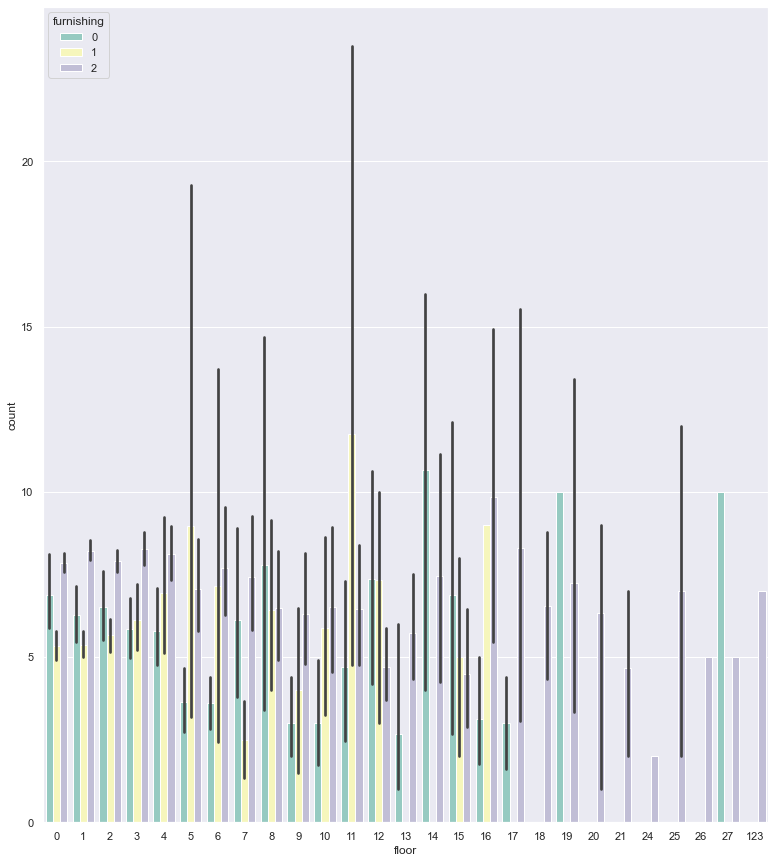

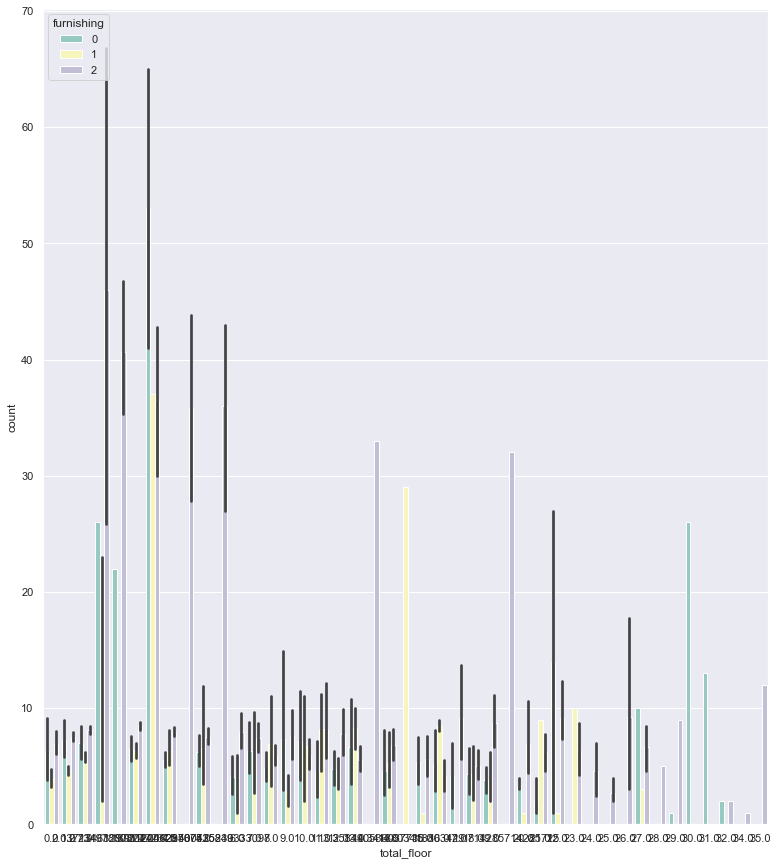

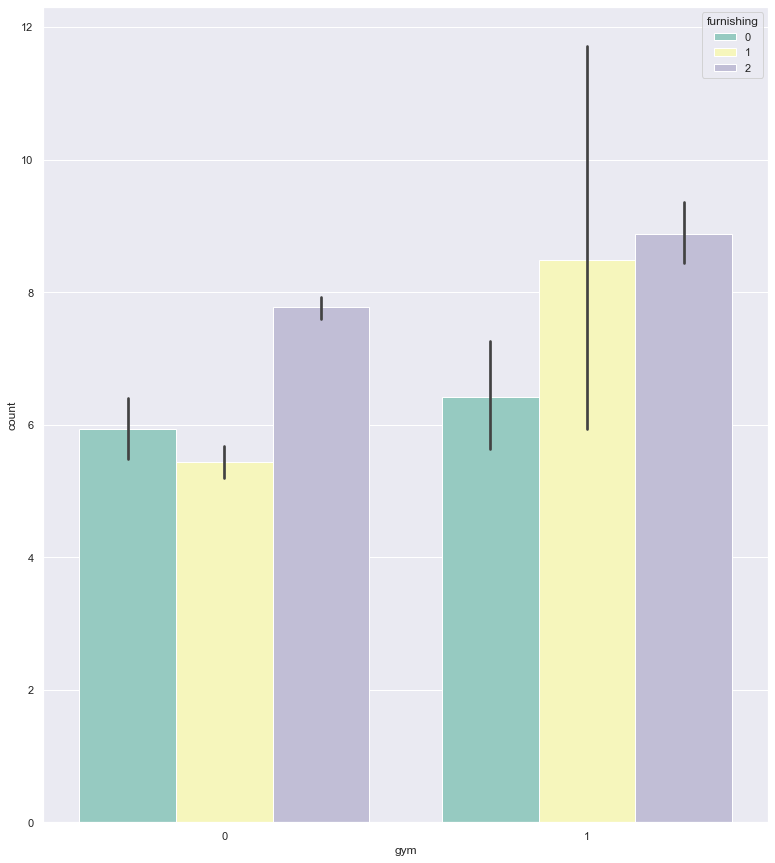

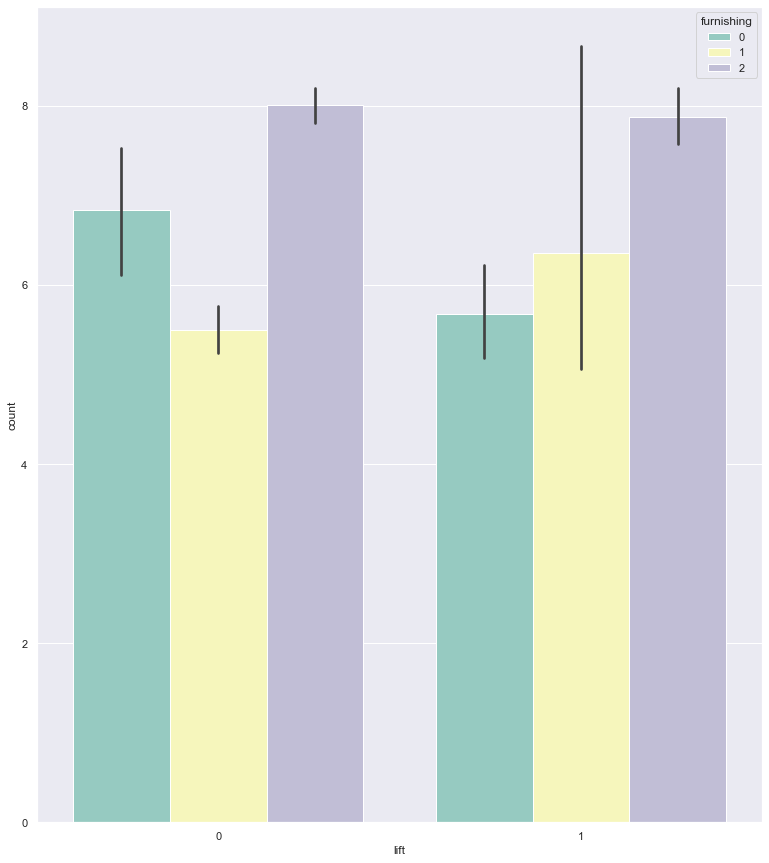

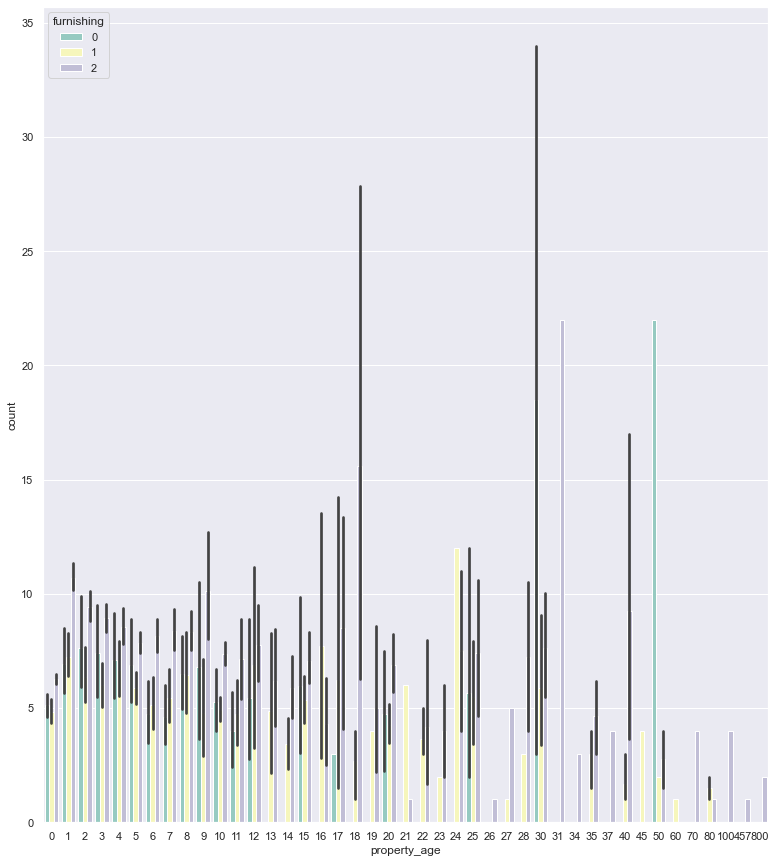

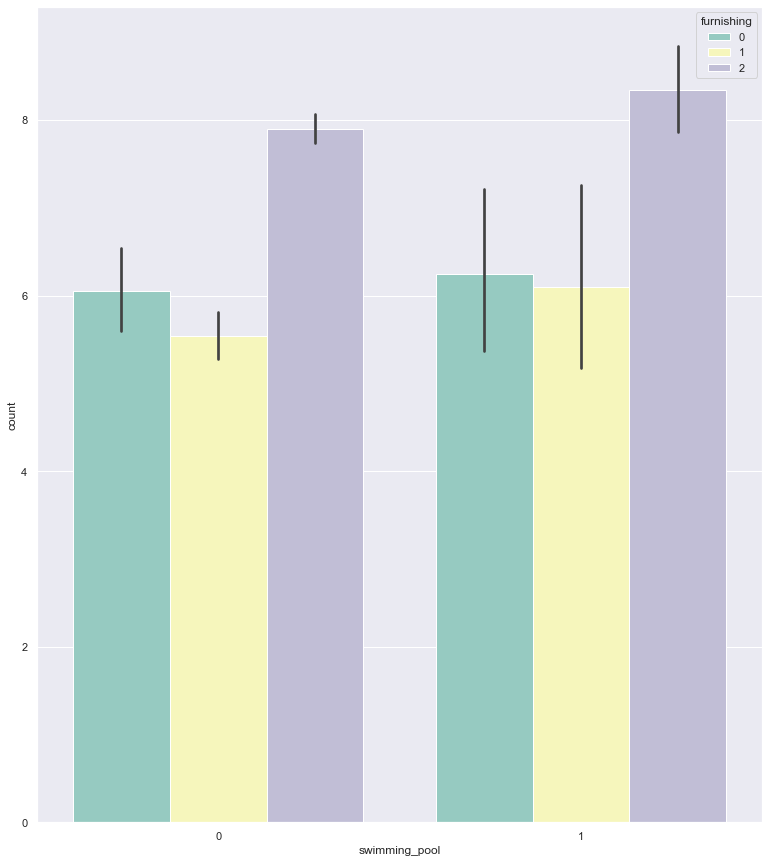

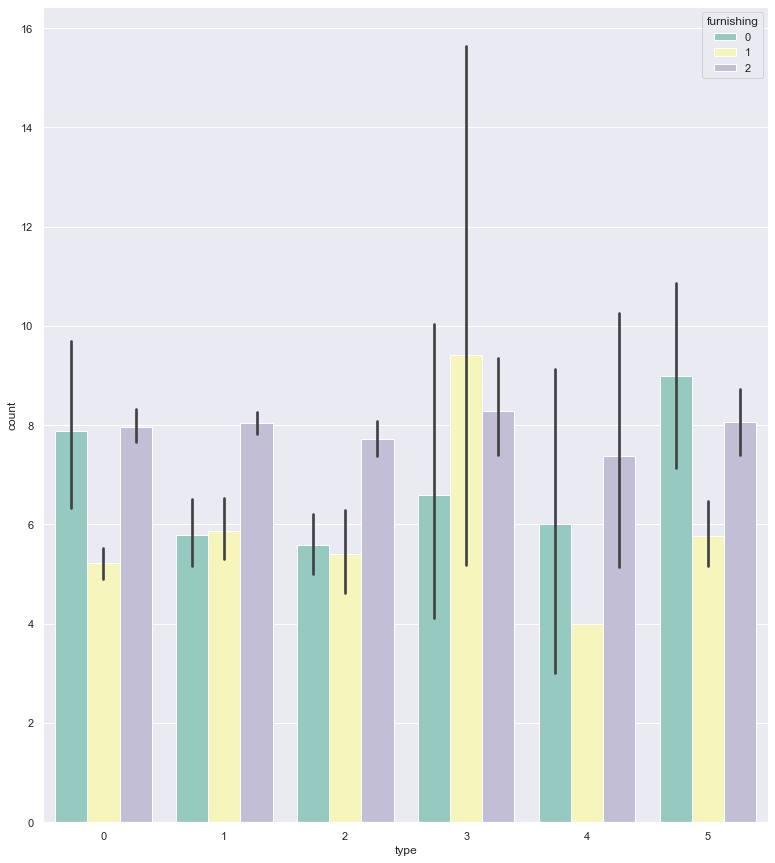

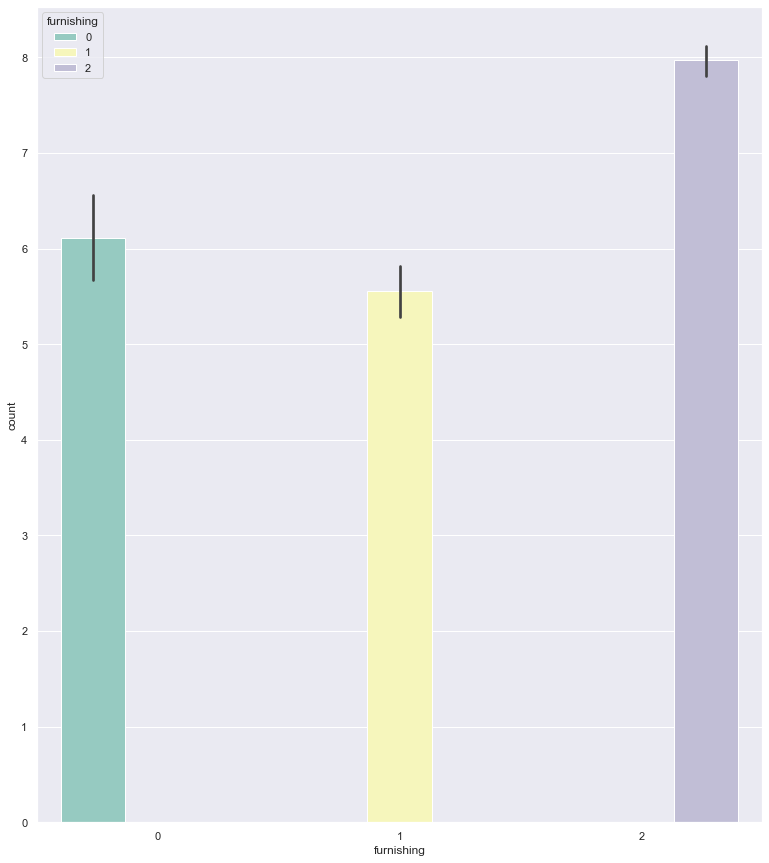

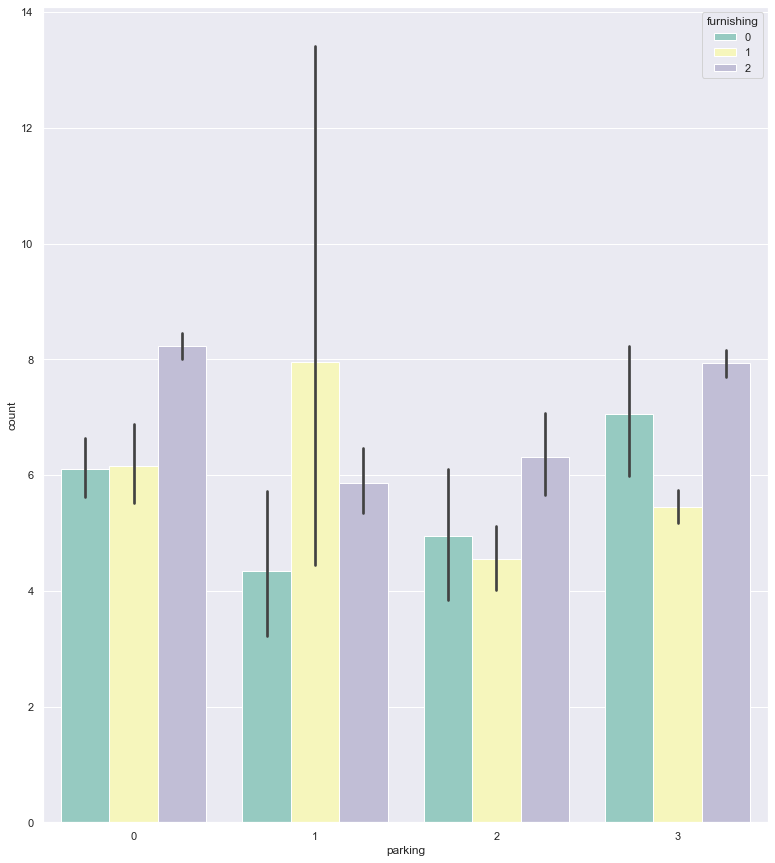

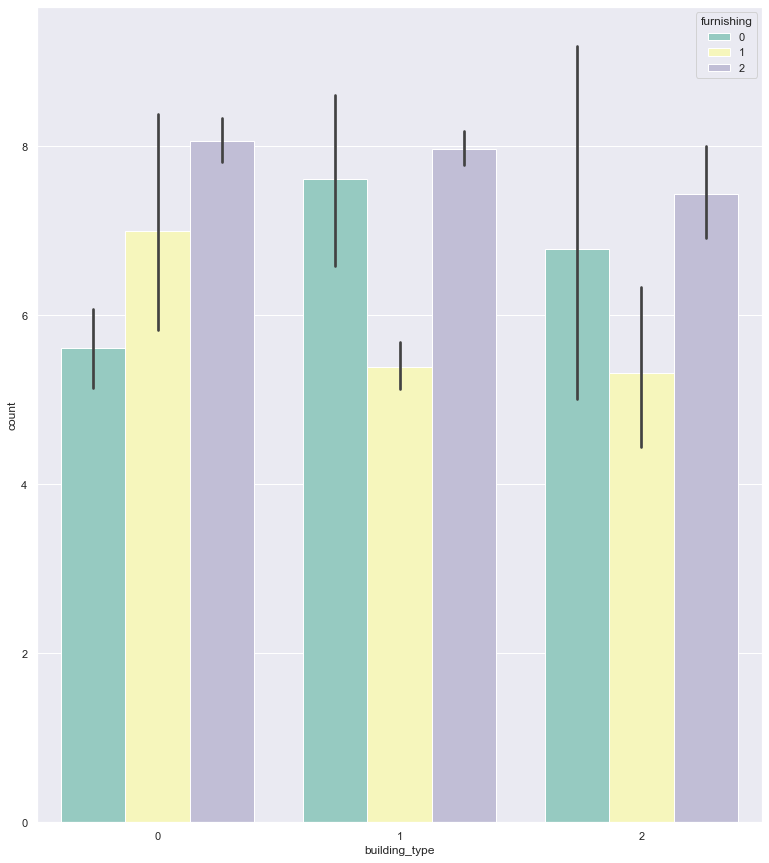

In [73]:
# Looping through all the features by our y variable - see if there is relationship

features = train_preprocessed.columns.drop(['property_id', 'count', 'locality', 'property_size', 'rent','lease_type', 'deposit'])

#building type: 0-Fully furnished, 1-Not furnished, 2-Semi furnished

for f in features:
    sns.barplot(x = f, data = train_preprocessed, palette = 'Set3',hue= 'furnishing',  y = 'count')
    plt.show()

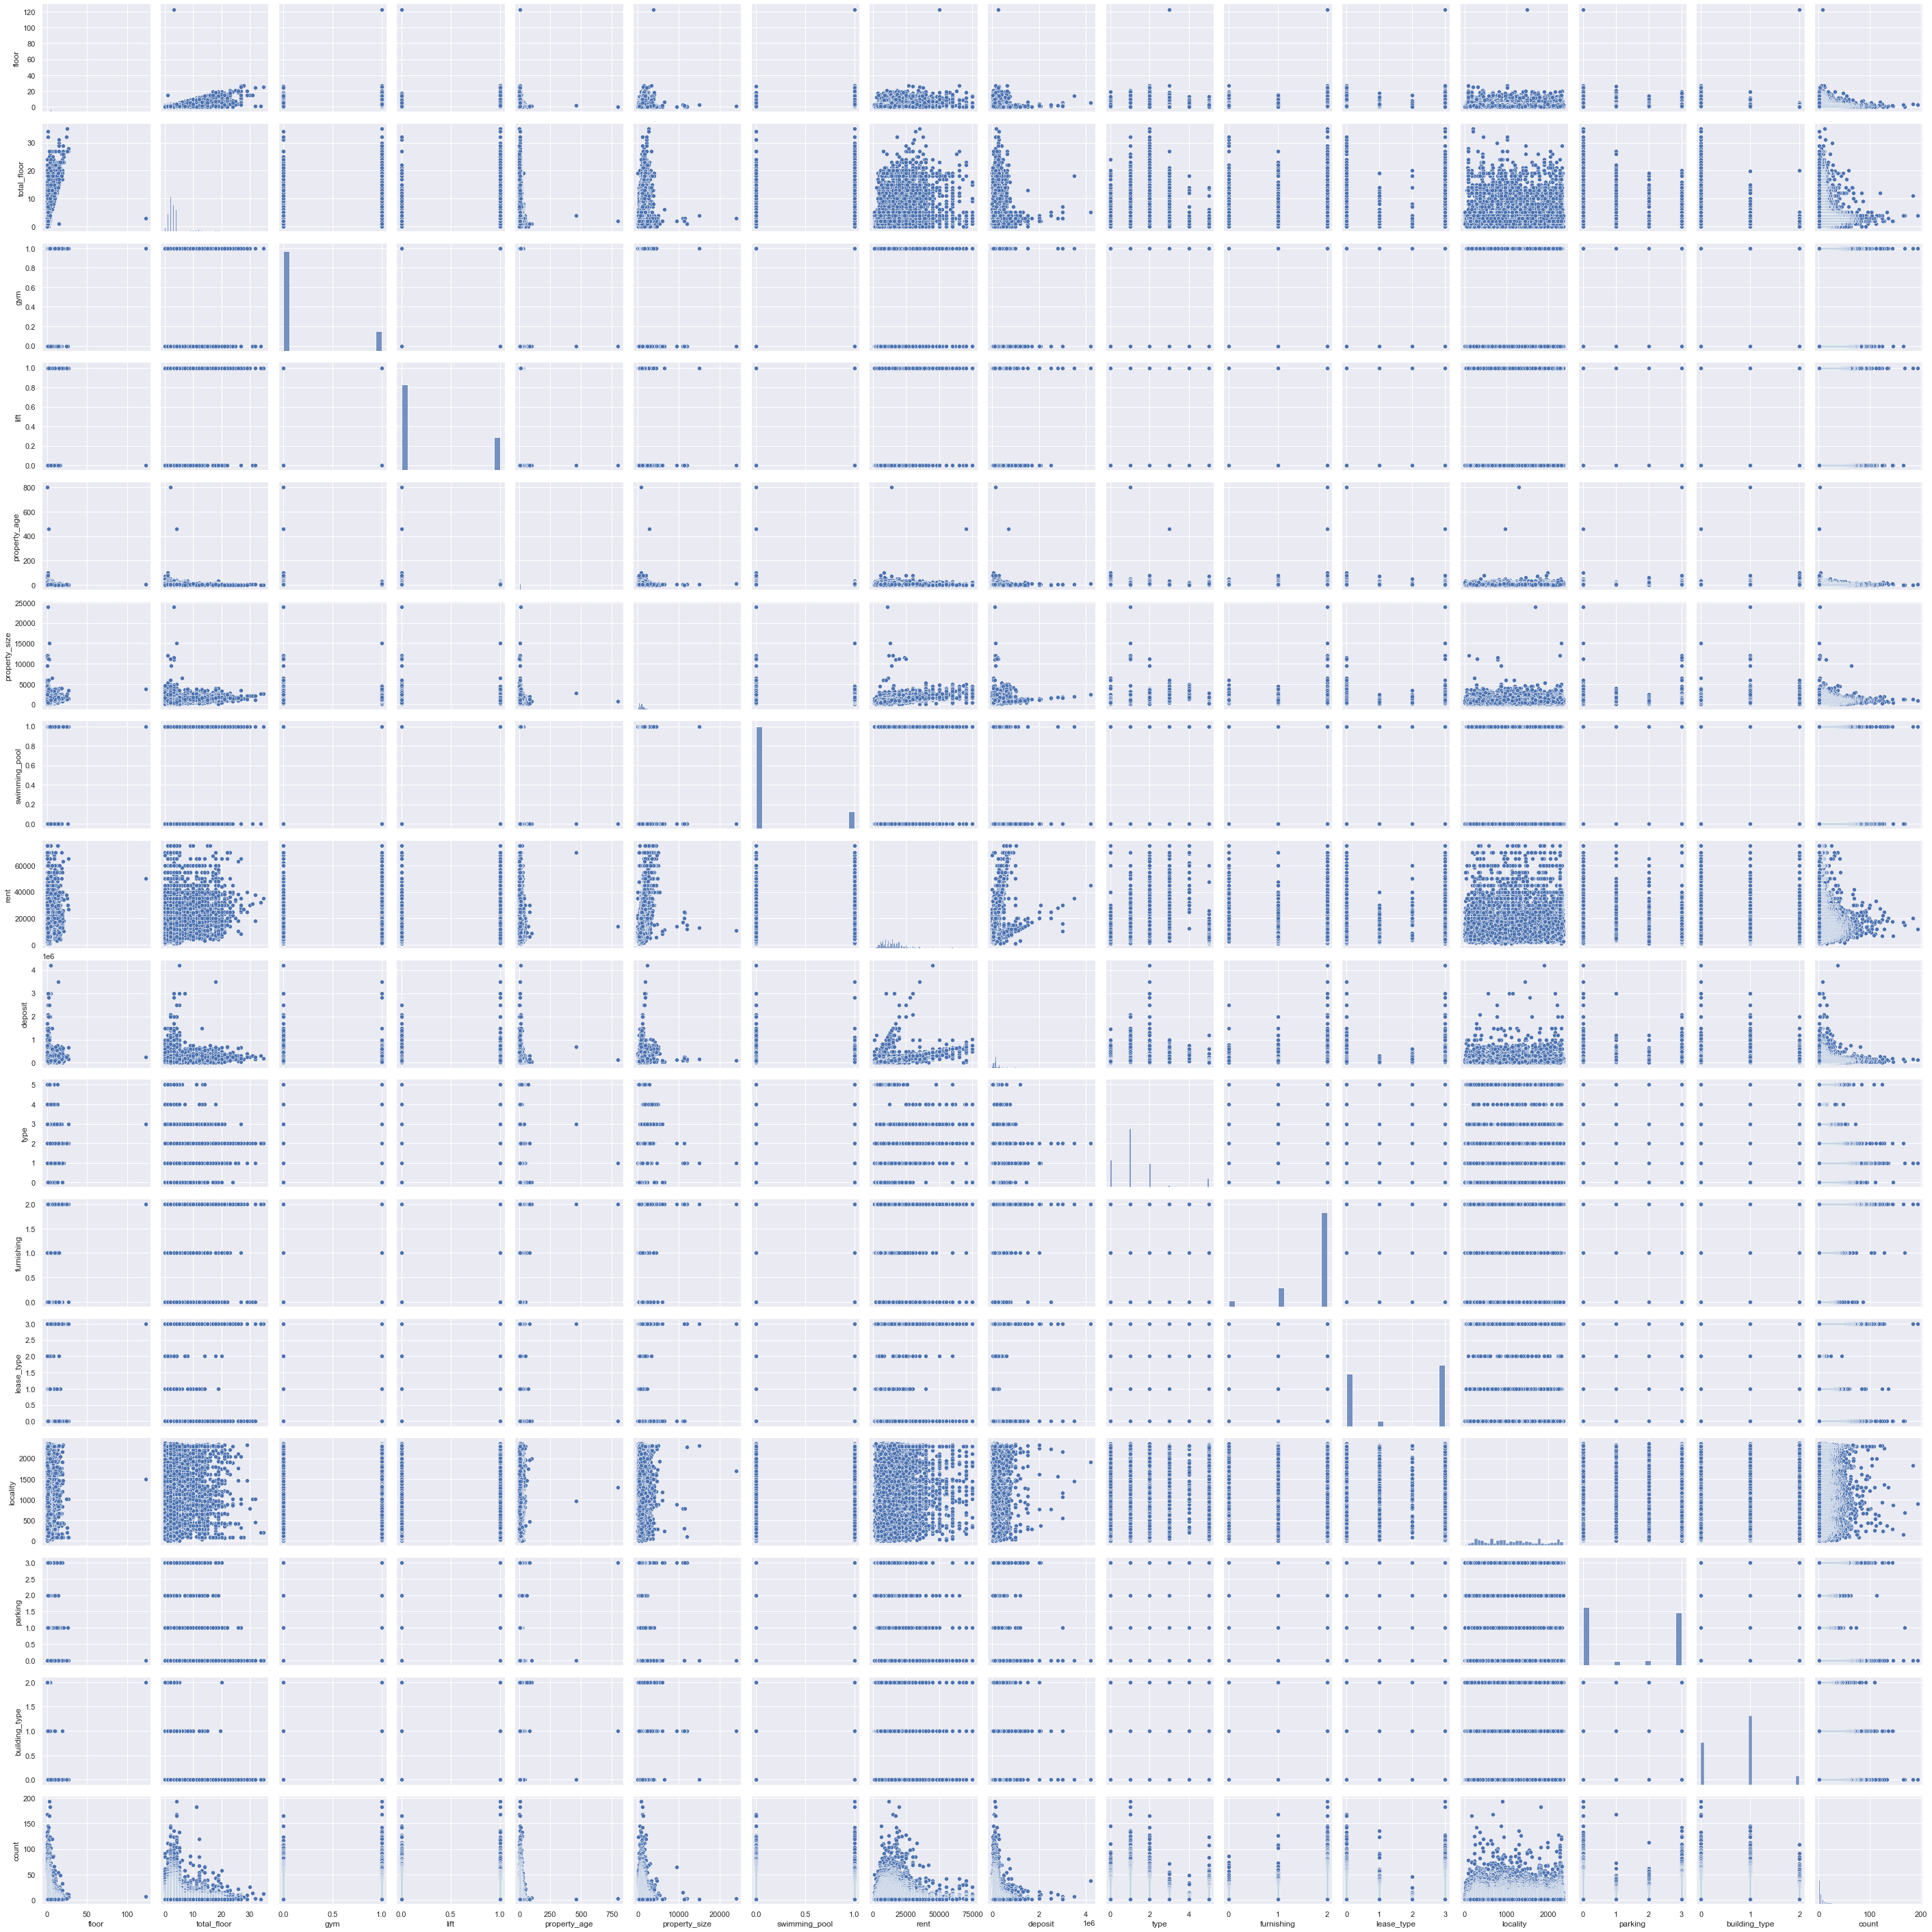

In [74]:
sns.pairplot(data= train_preprocessed)

# Insights on train dataset features based on furnishing feature, because it highly correlated to target feature 'count


1. 'floor' - From the plot we can see that most people interacted more for semi-furnished house which are mostly apartment building type since it has many floors. 70%

2. 'gym', 'furnishing', 'rent', 'property_size', 'property_age' - From these we can conclude that 

3.  people enquire more about furnishing quality of the house 65-70%

4. mostly prefer Building with GYM facility 45-50%

5. most people prefer for rental housing type 45-50%

6. last but not least, the size and age of the property also enquired 5-6%


# Buisness insight.

1. People who prefer gym, building with lift, expecting low property age, small property size,  swimming pool, good furnishing, large property size prefer going with  high rent and deposit option.

2. Moreover all the enquires on rental with apartment type buildings

3. More enquires are about apartment type, with lift, gym, with rental options.

4. The enquires with lease type facility mainly about IF-Individual Farm, 

5.  Increasing the parking facility, gym, lift facility, floors to be less than 10, large property, low property age, availing more rental facility in  AP apartment type buildings might icrease the buisness oppurtunities.

6. Building IF in large property, with gym, swimming pool, more parking,   might increase the lease, deposit type clients. 

7. Similarly IH type with low property age, in a moderate property size will attract deposit clients who are willing to buy individual homes.


In [75]:
train_preprocessed.corr()

,floor,total_floor,gym,lift,property_age,property_size,swimming_pool,rent,deposit,type,furnishing,lease_type,locality,parking,building_type,count
floor,1.000000,0.693317,0.366581,0.398168,-0.108925,0.182432,0.383079,0.224023,0.120735,0.118238,-0.021770,-0.030777,-0.008325,-0.207357,-0.381540,-0.011625
total_floor,0.693317,1.000000,0.526061,0.574249,-0.132775,0.287916,0.549595,0.341015,0.188477,0.095134,-0.006771,-0.027174,-0.009522,-0.328845,-0.538608,-0.013817
gym,0.366581,0.526061,1.000000,0.648404,-0.100241,0.356298,0.802993,0.367442,0.202507,0.101389,-0.008175,0.009524,0.024568,-0.395051,-0.465537,0.046712
lift,0.398168,0.574249,0.648404,1.000000,-0.114689,0.375279,0.598774,0.390001,0.221749,0.087397,-0.005125,0.010655,0.005034,-0.523875,-0.703503,0.004981
property_age,-0.108925,-0.132775,-0.100241,-0.114689,1.000000,-0.012127,-0.093846,0.028995,0.031788,-0.004806,-0.012905,0.018745,-0.002831,0.079759,0.119585,-0.010001
property_size,0.182432,0.287916,0.356298,0.375279,-0.012127,1.000000,0.351722,0.674197,0.455159,0.112957,0.087959,0.096880,0.017817,-0.479523,-0.214662,0.015032
swimming_pool,0.383079,0.549595,0.802993,0.598774,-0.093846,0.351722,1.000000,0.368386,0.207592,0.102117,-0.005266,0.007971,0.026060,-0.364084,-0.424671,0.020748
rent,0.224023,0.341015,0.367442,0.390001,0.028995,0.674197,0.368386,1.000000,0.648941,0.136134,0.095213,0.129990,-0.006080,-0.454176,-0.242830,0.006414
deposit,0.120735,0.188477,0.202507,0.221749,0.031788,0.455159,0.207592,0.648941,1.000000,0.087903,0.086229,0.125195,0.018342,-0.289203,-0.112330,0.012018
type,0.118238,0.095134,0.101389,0.087397,-0.004806,0.112957,0.102117,0.136134,0.087903,1.000000,-0.064847,-0.085510,0.007192,-0.085416,-0.031648,-0.000489
